<a href="https://colab.research.google.com/github/lionheart7dec/My_files/blob/master/Walmart_store_Weekly_Sales_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving features.csv to features.csv
Saving stores.csv to stores.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [7]:
pip install pyforest

  Created wheel for pyforest: filename=pyforest-0.1.4-py2.py3-none-any.whl size=9606 sha256=dbe76685baea703ae28d040cf740b237f4e122d997fc4cb58cd1f5dfbdd16e2e
  Stored in directory: /root/.cache/pip/wheels/b5/6f/28/9dd3fc38ca88e9c30712fc6c61aa83dca4dc496c82136c38f2
Successfully built pyforest


In [0]:
%matplotlib inline
from pyforest import *
from pandas_profiling import ProfileReport

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
feature = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

In [13]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [14]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [15]:
print(train.info())
print('****************************')
print(test.info())
print('****************************')
print(feature.info())
print('****************************')
print(stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
****************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
Store        115064 non-null int64
Dept         115064 non-null int64
Date         115064 non-null object
IsHoliday    115064 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
None
****************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null f

In [0]:
# Merging training dataset
train_m = pd.merge(train, stores)
train = pd.merge(train_m, feature)

In [0]:
test_m = pd.merge(test, stores)
test = pd.merge(test_m,feature)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Type            115064 non-null object
Size            115064 non-null int64
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
MarkDown1       114915 non-null float64
MarkDown2       86437 non-null float64
MarkDown3       105235 non-null float64
MarkDown4       102176 non-null float64
MarkDown5       115064 non-null float64
CPI             76902 non-null float64
Unemployment    76902 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [0]:
# Splitting numeric data 
train_num_var = [key for key in dict (train.dtypes) if dict(train.dtypes)[key] in ['float64','int64','float32','int32']]
#Training numeric data
train_num = train[train_num_var]
# Splitting categorical data 
train_cat_var = [key for key in dict (train.dtypes) if dict(train.dtypes)[key] in ['object']]
train_cat = train[train_cat_var]

In [22]:
print(train_num_var)
print(train_cat_var)

['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [23]:
train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


In [24]:
#Creating data auditing report for train dataset

def var_summary(x):
  return pd.Series([x.count,x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05), x.dropna().quantile(0.10), x.dropna().quantile(0.25), x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90), x.dropna().quantile(0.95), x.dropna().quantile(0.99), x.max()],
                   index = ['N','NMISS','SUM', 'MEAN', 'MEDIAN', 'STD','VAR','MIN', 'P1', 'P5', 'P10', 'P25','P50', 'P75', 'P90','P95', 'P99','MAX'])
num_summary = train_num.apply(lambda x:var_summary(x)).T
num_summary.to_csv('numeric_variable_summary.csv')
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,<bound method Series.count of 0 1\n1 ...,0,9359084,22.2005,22,12.7853,163.464,1,1,3,5,11,22,33,40,43,45,45
Dept,<bound method Series.count of 0 1\n1 ...,0,18658822,44.2603,37,30.4921,929.765,1,1,4,7,18,37,74,92,95,98,99
Weekly_Sales,<bound method Series.count of 0 24924....,0,6.73722e+09,15981.3,7612.03,22711.2,5.15798e+08,-4988.94,5,59.9745,291.097,2079.65,7612.03,20205.9,42845.7,61202,106480,693099
Size,<bound method Series.count of 0 151315...,0,57640387438,136728,140167,60980.6,3.71863e+09,34875,34875,39690,39910,93638,140167,202505,204184,206302,219622,219622
Temperature,<bound method Series.count of 0 42.31\...,0,2.53322e+07,60.0901,62.09,18.4479,340.326,-2.06,18.3,27.31,33.98,46.68,62.09,74.28,83.58,87.27,92.81,100.14
Fuel_Price,<bound method Series.count of 0 2.572\...,0,1.41691e+06,3.36103,3.452,0.458515,0.210236,2.472,2.565,2.653,2.72,2.933,3.452,3.738,3.917,4.029,4.202,4.468
MarkDown1,<bound method Series.count of 0 Na...,270889,1.0919e+09,7246.42,5347.45,8291.22,6.87444e+07,0.27,17.76,149.19,375.2,2240.27,5347.45,9210.9,15282.5,21801.3,41524,88646.8
MarkDown2,<bound method Series.count of 0 NaN\...,310322,3.70971e+08,3334.63,192,9475.36,8.97824e+07,-265.76,-0.99,1.95,6.98,41.6,192,1926.94,8549.74,16497.5,50366.6,104520
MarkDown3,<bound method Series.count of 0 NaN\...,284479,1.97332e+08,1439.42,24.6,9623.08,9.26036e+07,-29.1,0.06,0.65,1.65,5.08,24.6,103.99,400.09,1059.9,63143.3,141631
MarkDown4,<bound method Series.count of 0 NaN...,286603,4.56616e+08,3383.17,1481.31,6292.38,3.95941e+07,0.22,3.97,28.76,108.71,504.22,1481.31,3595.04,7871.42,12646,35785.3,67474.9


In [25]:
def cat_summary(x):
  return pd.Series([x.count,x.isnull().sum(), x.value_counts()],
                   index = ['N','NMISS','ColumnsName'])
cat_summary = train_cat.apply(lambda x:cat_summary(x))
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,<bound method Series.count of 0 1\n1 ...,0,9359084,22.2005,22,12.7853,163.464,1,1,3,5,11,22,33,40,43,45,45
Dept,<bound method Series.count of 0 1\n1 ...,0,18658822,44.2603,37,30.4921,929.765,1,1,4,7,18,37,74,92,95,98,99
Weekly_Sales,<bound method Series.count of 0 24924....,0,6.73722e+09,15981.3,7612.03,22711.2,5.15798e+08,-4988.94,5,59.9745,291.097,2079.65,7612.03,20205.9,42845.7,61202,106480,693099
Size,<bound method Series.count of 0 151315...,0,57640387438,136728,140167,60980.6,3.71863e+09,34875,34875,39690,39910,93638,140167,202505,204184,206302,219622,219622
Temperature,<bound method Series.count of 0 42.31\...,0,2.53322e+07,60.0901,62.09,18.4479,340.326,-2.06,18.3,27.31,33.98,46.68,62.09,74.28,83.58,87.27,92.81,100.14
Fuel_Price,<bound method Series.count of 0 2.572\...,0,1.41691e+06,3.36103,3.452,0.458515,0.210236,2.472,2.565,2.653,2.72,2.933,3.452,3.738,3.917,4.029,4.202,4.468
MarkDown1,<bound method Series.count of 0 Na...,270889,1.0919e+09,7246.42,5347.45,8291.22,6.87444e+07,0.27,17.76,149.19,375.2,2240.27,5347.45,9210.9,15282.5,21801.3,41524,88646.8
MarkDown2,<bound method Series.count of 0 NaN\...,310322,3.70971e+08,3334.63,192,9475.36,8.97824e+07,-265.76,-0.99,1.95,6.98,41.6,192,1926.94,8549.74,16497.5,50366.6,104520
MarkDown3,<bound method Series.count of 0 NaN\...,284479,1.97332e+08,1439.42,24.6,9623.08,9.26036e+07,-29.1,0.06,0.65,1.65,5.08,24.6,103.99,400.09,1059.9,63143.3,141631
MarkDown4,<bound method Series.count of 0 NaN...,286603,4.56616e+08,3383.17,1481.31,6292.38,3.95941e+07,0.22,3.97,28.76,108.71,504.22,1481.31,3595.04,7871.42,12646,35785.3,67474.9


In [0]:
# Splitting numeric data 
test_num_var = [key for key in dict (test.dtypes) if dict(test.dtypes)[key] in ['float64','int64','float32','int32']]
#Training numeric data
test_num = test[test_num_var]
# Splitting categorical data 
test_cat_var = [key for key in dict (test.dtypes) if dict(test.dtypes)[key] in ['object']]
test_cat = test[test_cat_var]

In [28]:
#Creating data auditing report for train dataset

def var_summary(x):
  return pd.Series([x.count,x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05), x.dropna().quantile(0.10), x.dropna().quantile(0.25), x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90), x.dropna().quantile(0.95), x.dropna().quantile(0.99), x.max()],
                   index = ['N','NMISS','SUM', 'MEAN', 'MEDIAN', 'STD','VAR','MIN', 'P1', 'P5', 'P10', 'P25','P50', 'P75', 'P90','P95', 'P99','MAX'])
num_summary = test_num.apply(lambda x:var_summary(x)).T
num_summary.to_csv('numeric_variable_summary.csv')
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,<bound method Series.count of 0 1\n1 ...,0,2558817,22.2382,22,12.8099,164.094,1,1,3,5,11,22,33,40,43,45,45
Dept,<bound method Series.count of 0 1\n1 ...,0,5101883,44.3395,37,30.6564,939.815,1,1,4,7,18,37,74,92,95,98,99
Size,<bound method Series.count of 0 151315...,0,15705970078,136498,140167,61106.9,3.73406e+09,34875,34875,39690,39910,93638,140167,202505,204184,206302,219622,219622
Temperature,<bound method Series.count of 0 55.32\...,0,6.20676e+06,53.9418,54.47,18.7242,350.594,-7.29,11.44,23.98,29.97,39.82,54.47,67.35,79.48,83.82,92.14,101.95
Fuel_Price,<bound method Series.count of 0 3.386\...,0,412107,3.58155,3.606,0.239442,0.0573324,2.872,2.957,3.161,3.227,3.431,3.606,3.766,3.866,3.951,4.079,4.125
MarkDown1,<bound method Series.count of 0 6766.4...,149,8.83606e+08,7689.22,4842.29,10698.8,1.14463e+08,-2781.45,20.84,189.49,457.66,1966.46,4842.29,9439.14,15325,23140.9,65757.6,103185
MarkDown2,<bound method Series.count of 0 5147.7...,28627,3.2276e+08,3734.05,742.59,8323.5,6.92806e+07,-35.74,0.02,6.14,25.77,180.35,742.59,2735.67,9277.29,22671.7,42920.2,71074.2
MarkDown3,<bound method Series.count of 0 50.82\...,9829,2.52889e+08,2403.09,78.26,13767.9,1.89556e+08,-179.26,0.15,1.18,3.1,15.1,78.26,272.58,698.93,2361.57,86476.7,149483
MarkDown4,<bound method Series.count of 0 3639.9...,12888,3.42925e+08,3356.22,840.94,7570.5,5.73125e+07,0.22,2.61,16.96,37.36,155.46,840.94,3096.92,7674.41,14191,44739.3,65344.6
MarkDown5,<bound method Series.count of 0 2737.4...,0,4.51359e+08,3922.68,2390.43,19445.2,3.78114e+08,-185.17,269.3,540.89,770.883,1309.3,2390.43,4227.27,6966.34,9316.71,18599.3,771448


In [29]:
ProfileReport(train)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,16
Number of observations,421570
Total Missing (%),21.1%
Total size in memory,51.9 MiB
Average record size in memory,129.0 B
Numeric,13
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [30]:
ProfileReport(test)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,15
Number of observations,115064
Total Missing (%),7.4%
Total size in memory,13.3 MiB
Average record size in memory,121.0 B
Numeric,12
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [31]:
# Correlation
train_corr = pd.DataFrame(train.corr())
train_corr.to_csv('train_data_csv', index = True)
train_corr

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238
Temperature,-0.050097,0.004437,-0.002312,-0.155949,-0.058313,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.003361,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,0.345673,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285
MarkDown2,-0.035173,0.000290,0.024130,0.334818,0.108827,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940
MarkDown3,-0.031556,0.001784,0.060385,0.427960,0.048913,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818


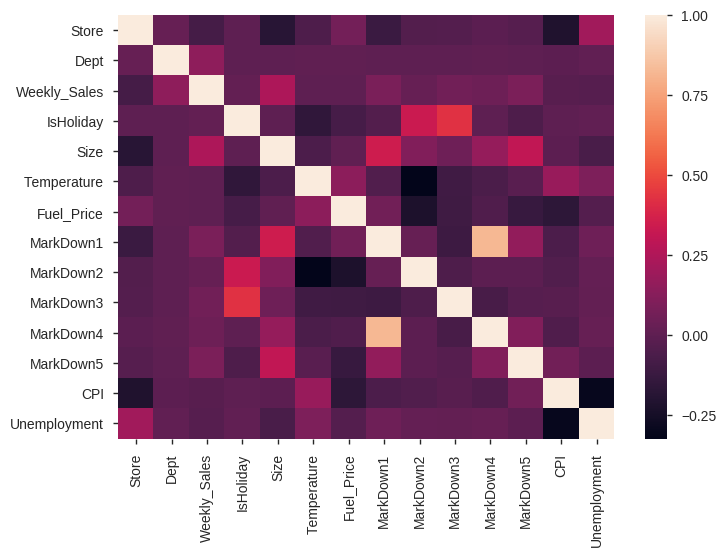

In [32]:
sns.heatmap(train.corr())

In [33]:
test_corr = pd.DataFrame(test.corr())
test.corr

<bound method DataFrame.corr of         Store  Dept        Date  ...  MarkDown5         CPI  Unemployment
0           1     1  2012-11-02  ...    2737.42  223.462779         6.573
1           1     2  2012-11-02  ...    2737.42  223.462779         6.573
2           1     3  2012-11-02  ...    2737.42  223.462779         6.573
3           1     4  2012-11-02  ...    2737.42  223.462779         6.573
4           1     5  2012-11-02  ...    2737.42  223.462779         6.573
...       ...   ...         ...  ...        ...         ...           ...
115059     45    93  2013-07-26  ...    1864.57         NaN           NaN
115060     45    94  2013-07-26  ...    1864.57         NaN           NaN
115061     45    95  2013-07-26  ...    1864.57         NaN           NaN
115062     45    97  2013-07-26  ...    1864.57         NaN           NaN
115063     45    98  2013-07-26  ...    1864.57         NaN           NaN

[115064 rows x 15 columns]>

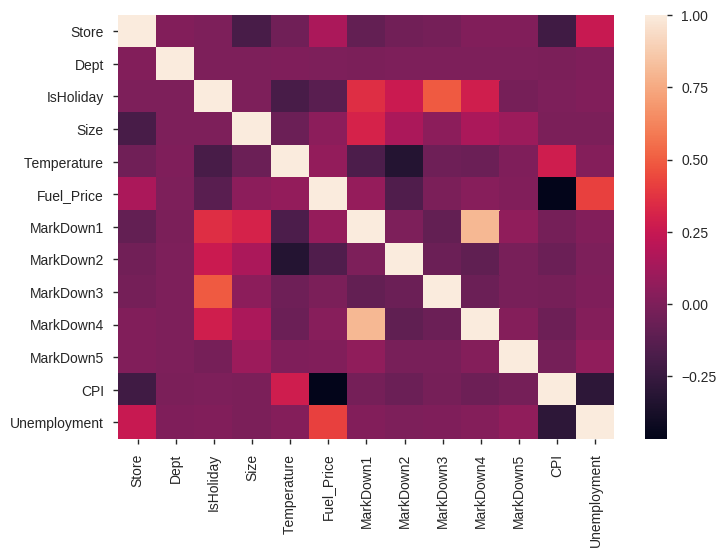

In [34]:
sns.heatmap(test_corr)

### **Data Exploratory Analysis**

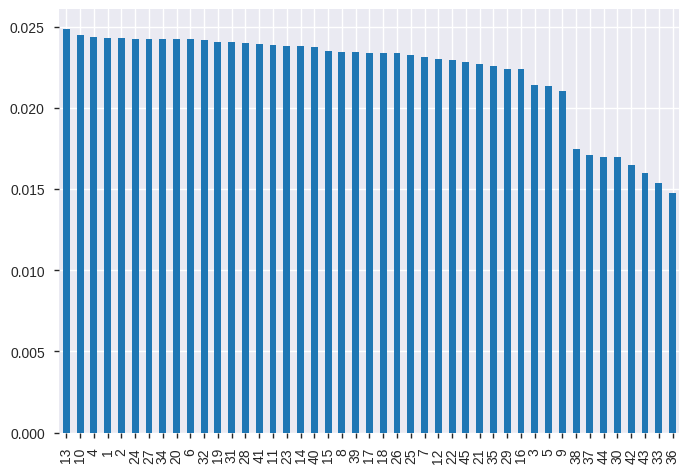

In [35]:
train['Store'].value_counts(normalize = True).plot(kind = 'bar', fig = (4,5))

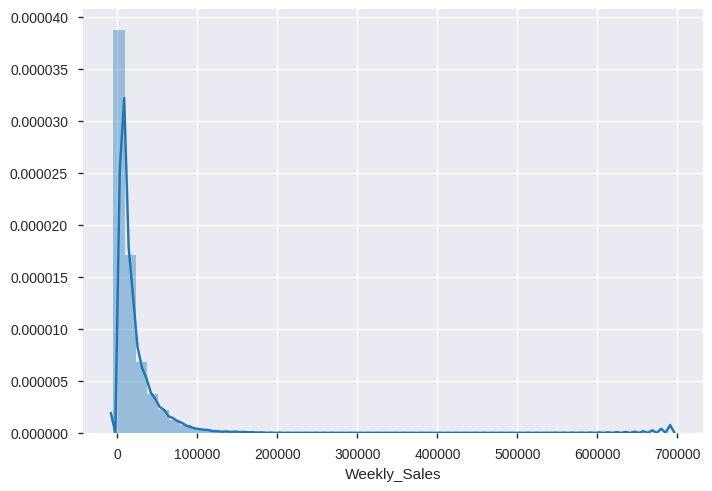

In [36]:
#Distribution of weekly sales 

sns.distplot(train.Weekly_Sales)

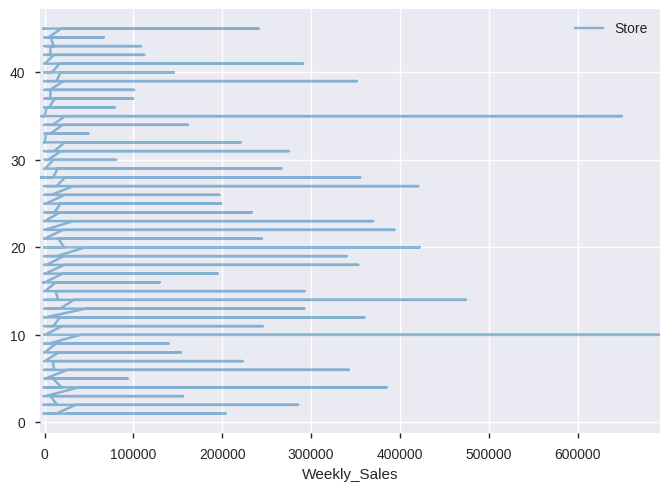

In [37]:
# Store Size v/s Sales
train.plot(kind = 'line', x = 'Weekly_Sales', y = 'Store', alpha = 0.5)

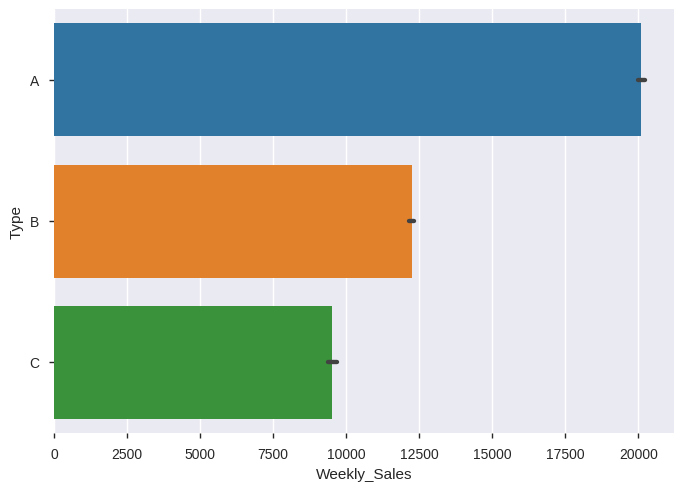

In [38]:
#Sales v/s Type
sns.barplot(x = train['Weekly_Sales'], y = train['Type'])

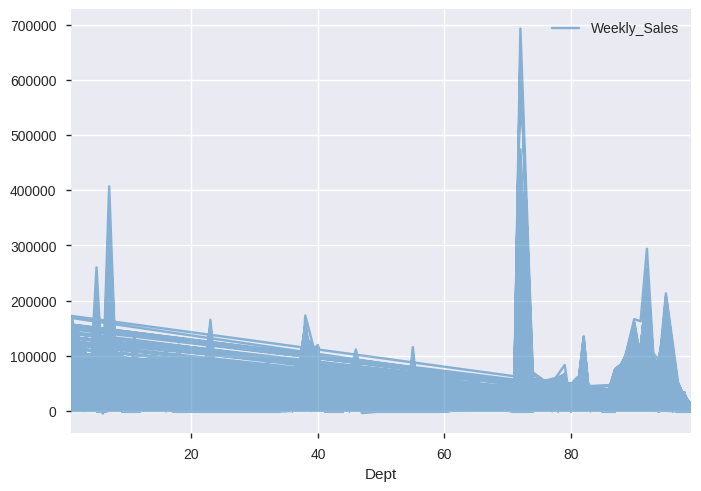

In [39]:
# Plotting Sales v/s Department
train.plot(kind = 'line', x = 'Dept', y = 'Weekly_Sales', alpha = 1.5, fig = (4,5))

### **Treating missing values**

In [40]:
print(train.isnull().sum())
print('_'*25)
print(test.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64
_________________________
Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


In [0]:
test.CPI = test.groupby(['Dept'])['CPI'].transform(lambda x:x.fillna(x.mean()))
test.Unemployment = test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [0]:
train = train.fillna(0)
test = test.fillna(0)

In [43]:
print(train.isnull().sum())
print('_'*25)
print(test.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
_________________________
Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [0]:
train.Weekly_Sales = np.where(train.Weekly_Sales>100000, 100000, train.Weekly_Sales)

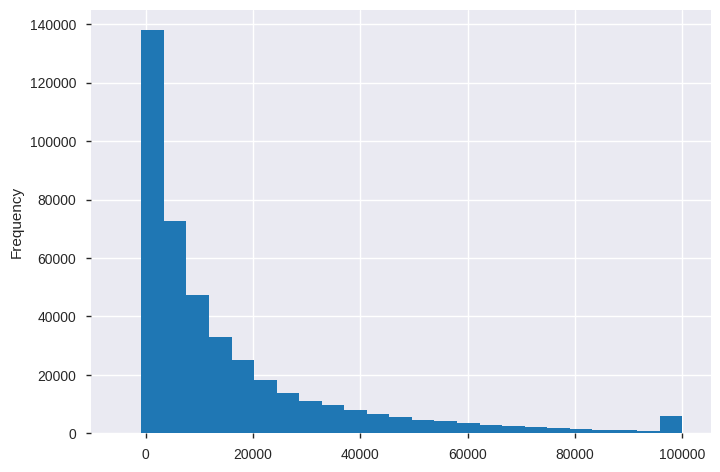

In [45]:
train.Weekly_Sales.plot.hist(bins = 25)

In [46]:
# Creating new features to train
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 71.9+ MB


In [0]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [0]:
# Extracting date features

train['Date_year'] = train['Date'].dt.year
train['Date_month'] = train['Date'].dt.month
train['Date_day'] = train['Date'].dt.day
train['Day_dayofweek'] = train['Date']. dt.dayofweek


test['Date_year'] = test['Date'].dt.year
test['Date_month'] = test['Date'].dt.month
test['Date_day'] = test['Date'].dt.day
test['Day_dayofweek'] = test['Date']. dt.dayofweek

In [49]:
print(train.Type.value_counts())
print('_'*25)
print(test.Type.value_counts())

A    215478
B    163495
C     42597
Name: Type, dtype: int64
_________________________
A    58713
B    44500
C    11851
Name: Type, dtype: int64


In [50]:
print(train.IsHoliday.value_counts())
print('_'*25)
print(test.IsHoliday.value_counts())

False    391909
True      29661
Name: IsHoliday, dtype: int64
_________________________
False    106136
True       8928
Name: IsHoliday, dtype: int64


In [0]:
data = [train, test]

### **Converting categorical variable 'Type' into Numeric variables**

In [0]:
type_mapping = {'A':1, 'B':2, 'C': 3}
for dataset in data:
  dataset['Type'] = dataset['Type'].map(type_mapping)

### **Converting Categorical  Variable**

In [0]:
type_mapping = {False: 0, True: 1}
for dataset in data:
  dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

### **Creating Extra Holiday Variable**

In [0]:
from datetime import datetime

In [0]:
# Creating New Holiday Variable based on given data 
train['super_bowl'] = np.where((train['Date'] == datetime(2010, 2, 12))  |  (train['Date'] == datetime(2011, 2, 11))  |  (train['Date'] == datetime(2012, 2, 10))  |  (train['Date'] == datetime(2013, 2, 8)), 1, 0 )

train['labour_day'] = np.where((train['Date'] == datetime(2010, 9, 10))  |  (train['Date'] == datetime(2011, 9, 11))  |  (train['Date'] == datetime(2012, 9, 7))  |  (train['Date'] == datetime(2013, 9, 6)),1 , 0)

train['thanksgiving'] = np.where((train['Date'] == datetime(2010, 11, 26))  |  (train['Date'] == datetime(2011, 11, 25))  | (train['Date'] == datetime(2012, 11, 23))  |  (train['Date'] == datetime(2013, 11, 29)),1 ,0)

train['christmas']  = np.where((train['Date']  == datetime(2010, 12, 31))  |  (train['Date']  == datetime(2011, 12, 30))  |  (train['Date']  == datetime(2012, 12, 28))  |  (train['Date']  == datetime(2013, 12, 27)),1 ,0)

In [0]:
# Creating New Holiday Variable based on given data 
test['super_bowl'] = np.where((test['Date'] == datetime(2010, 2, 12))  |  (test['Date'] == datetime(2011, 2, 11))  |  (test['Date'] == datetime(2012, 2, 10))  |  (test['Date'] == datetime(2013, 2, 8)), 1, 0 )

test['labour_day'] = np.where((test['Date'] == datetime(2010, 9, 10))  |  (test['Date'] == datetime(2011, 9, 11))  |  (test['Date'] == datetime(2012, 9, 7))  |  (test['Date'] == datetime(2013, 9, 6)),1 , 0)

test['thanksgiving'] = np.where((test['Date'] == datetime(2010, 11, 26))  |  (test['Date'] == datetime(2011, 11, 25))  | (test['Date'] == datetime(2012, 11, 23))  |  (test['Date'] == datetime(2013, 11, 29)),1 ,0)

test['christmas']  = np.where((test['Date']  == datetime(2010, 12, 31))  |  (test['Date']  == datetime(2011, 12, 30))  |  (test['Date']  == datetime(2012, 12, 28))  |  (test['Date']  == datetime(2013, 12, 27)),1 ,0)

In [0]:
# Altering the new holidays values depending on the new holidays

train['IsHoliday'] = train['IsHoliday'] | train['super_bowl']  | train['labour_day']  |  train['thanksgiving']  |  train['christmas']

test['IsHoliday'] = test['IsHoliday'] | test['super_bowl']  | test['labour_day']  |  test['thanksgiving']  |  test['christmas']

In [75]:
print(train.super_bowl.value_counts())
print(train.labour_day.value_counts())
print(train.thanksgiving.value_counts())
print(train.christmas.value_counts())

0    412675
1      8895
Name: super_bowl, dtype: int64
0    415667
1      5903
Name: labour_day, dtype: int64
0    415611
1      5959
Name: thanksgiving, dtype: int64
0    415624
1      5946
Name: christmas, dtype: int64


In [76]:
print(test.super_bowl.value_counts())
print(test.labour_day.value_counts())
print(test.thanksgiving.value_counts())
print(test.christmas.value_counts())

0    112100
1      2964
Name: super_bowl, dtype: int64
0    115064
Name: labour_day, dtype: int64
0    112088
1      2976
Name: thanksgiving, dtype: int64
0    112076
1      2988
Name: christmas, dtype: int64


In [0]:
# Imputed holidays according to extra holidays but being these redundant needs to be droppped

x = ['super_bowl', 'labour_day', 'thanksgiving', 'christmas']
train.drop(x, axis = 1, inplace = True)
test.drop(x, axis = 1, inplace = True) 

### **Classification & Accuracy**

In [0]:
train_X = train.drop(['Weekly_Sales', 'Date'], axis = 1)
train_y = train['Weekly_Sales']

In [81]:
test_X = test.drop('Date',axis=1).copy()
train_X.shape, train_y.shape, test_X.shape

((421570, 18), (421570,), (115064, 18))

### **Building Models**
### Linear Regression

In [0]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [83]:
l_reg = LinearRegression()
l_reg.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
y_pred = l_reg.predict(test_X)
acc_reg = round(l_reg.score(train_X, train_y)*100, 2)
print('Accuracy of Linear Regression:' +str(acc_reg)+'%')

Accuracy of Linear Regression:8.99%


### Random Forest

In [86]:
reg = RandomForestRegressor()
reg.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [87]:
y_pred_rf = reg.predict(test_X)
acc_rf = round(reg.score(train_X, train_y)*100, 2)
print('Accuracy of Random Forest:'+str(acc_rf) +'%')

Accuracy of Random Forest:99.66%


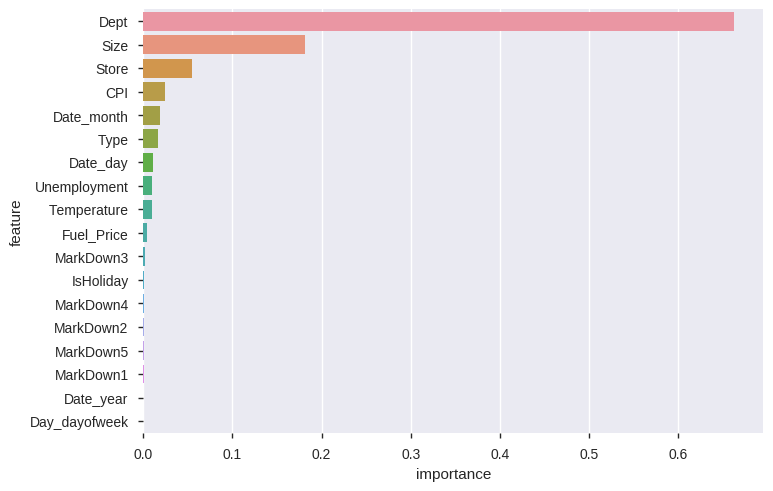

In [89]:
indices = np.argsort(reg.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns=['rank', 'feature', 'importance'])

for f in range(train_X.shape[1]):
  feature_rank.loc[f]= [f+1, train_X.columns[indices[f]],
                        reg.feature_importances_[indices[f]]]

sns.barplot(y = 'feature', x = 'importance', data = feature_rank)

### Decision Tree

In [96]:
dtr = DecisionTreeRegressor()
dtr.fit(train_X, train_y)
y_pred_dt = dtr.predict(test_X)
acc_dt = round(dtr.score(train_X, train_y)*100, 2)

print('Accuracy of Decision Tree:' +str(acc_dt) +'%')

Accuracy of Decision Tree:100.0%


### Comparing Models

In [98]:
models = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest', 'Decision Tree'],
                       'Score': [acc_reg, acc_rf, acc_dt]})

models.sort_values(by='Score', ascending = False)

,Model,Score
2,Decision Tree,100.00
1,Random Forest,99.66
0,Linear Regression,8.99


### Predicting Sales value for test data based on highest score model

In [0]:
submission = pd.DataFrame({'Store_Dept_Date': test.Store.astype(str)+'_'+ test.Dept.astype(str)+'_'+test.Date.astype(str),
                           'Weekly_Sales': y_pred_dt})

submission.to_csv('weekly_sales Predicted.csv', index = False)
# Submission.to_excel(writer, 'Weekly_salesPred', index = False) 

In [101]:
submission.head()

,Store_Dept_Date,Weekly_Sales
0,1_1_2012-11-02,35991.04
1,1_2_2012-11-02,49357.43
2,1_3_2012-11-02,10104.36
3,1_4_2012-11-02,18774.46
4,1_5_2012-11-02,25250.22
